In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
#CART

In [ ]:
df = pd.read_csv('drug200.csv')
df.head(10)

In [4]:
df.columns

Index(['Age', 'Gender', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [11]:
X = df[['Age','Gender','BP','Cholesterol','Na_to_K']].values
X[0:10]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.113999999999999],
       [28, 'F', 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 'F', 'LOW', 'HIGH', 18.043],
       [22, 'F', 'NORMAL', 'HIGH', 8.607000000000001],
       [49, 'F', 'NORMAL', 'HIGH', 16.275],
       [41, 'M', 'LOW', 'HIGH', 11.037],
       [60, 'M', 'NORMAL', 'HIGH', 15.171],
       [43, 'M', 'LOW', 'NORMAL', 19.368]], dtype=object)

In [ ]:
#Class or Target Variable
y = df['Drug']
y[0:10]

In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['F','M'])
X[:,1] = le.transform(X[:,1])


#Tranform BP attribue
le.fit(['LOW','NORMAL','HIGH'])
X[:,2] = le.transform(X[:,2])

#Trnaform Cholesterol
le.fit(['NORMAL','HIGH'])
X[:,3]=le.transform(X[:,3])



In [ ]:
X[0:5]

In [21]:
#Decison tree Setting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=3)




In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((140, 5), (60, 5), (140,), (60,))

In [58]:
drug_tree = DecisionTreeClassifier(ccp_alpha=0.2,criterion='entropy', max_depth=4)
drug_tree

DecisionTreeClassifier(ccp_alpha=0.2, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [59]:
drug_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.2, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from sklearn import tree
tree.plot_tree(drug_tree)

In [60]:
pred_tree = drug_tree.predict(X_test)

In [27]:
pred_tree[0:5] , y_test[0:5]

(array(['drugY', 'drugX', 'drugX', 'drugX', 'drugX'], dtype=object),
 40     drugY
 51     drugX
 139    drugX
 197    drugX
 170    drugX
 Name: Drug, dtype: object)

In [61]:
from sklearn import metrics
print('DT accuracy:', metrics.accuracy_score(y_test,pred_tree))
import matplotlib.pyplot as plt



DT accuracy: 0.8166666666666667


In [33]:
from sklearn.tree import plot_tree

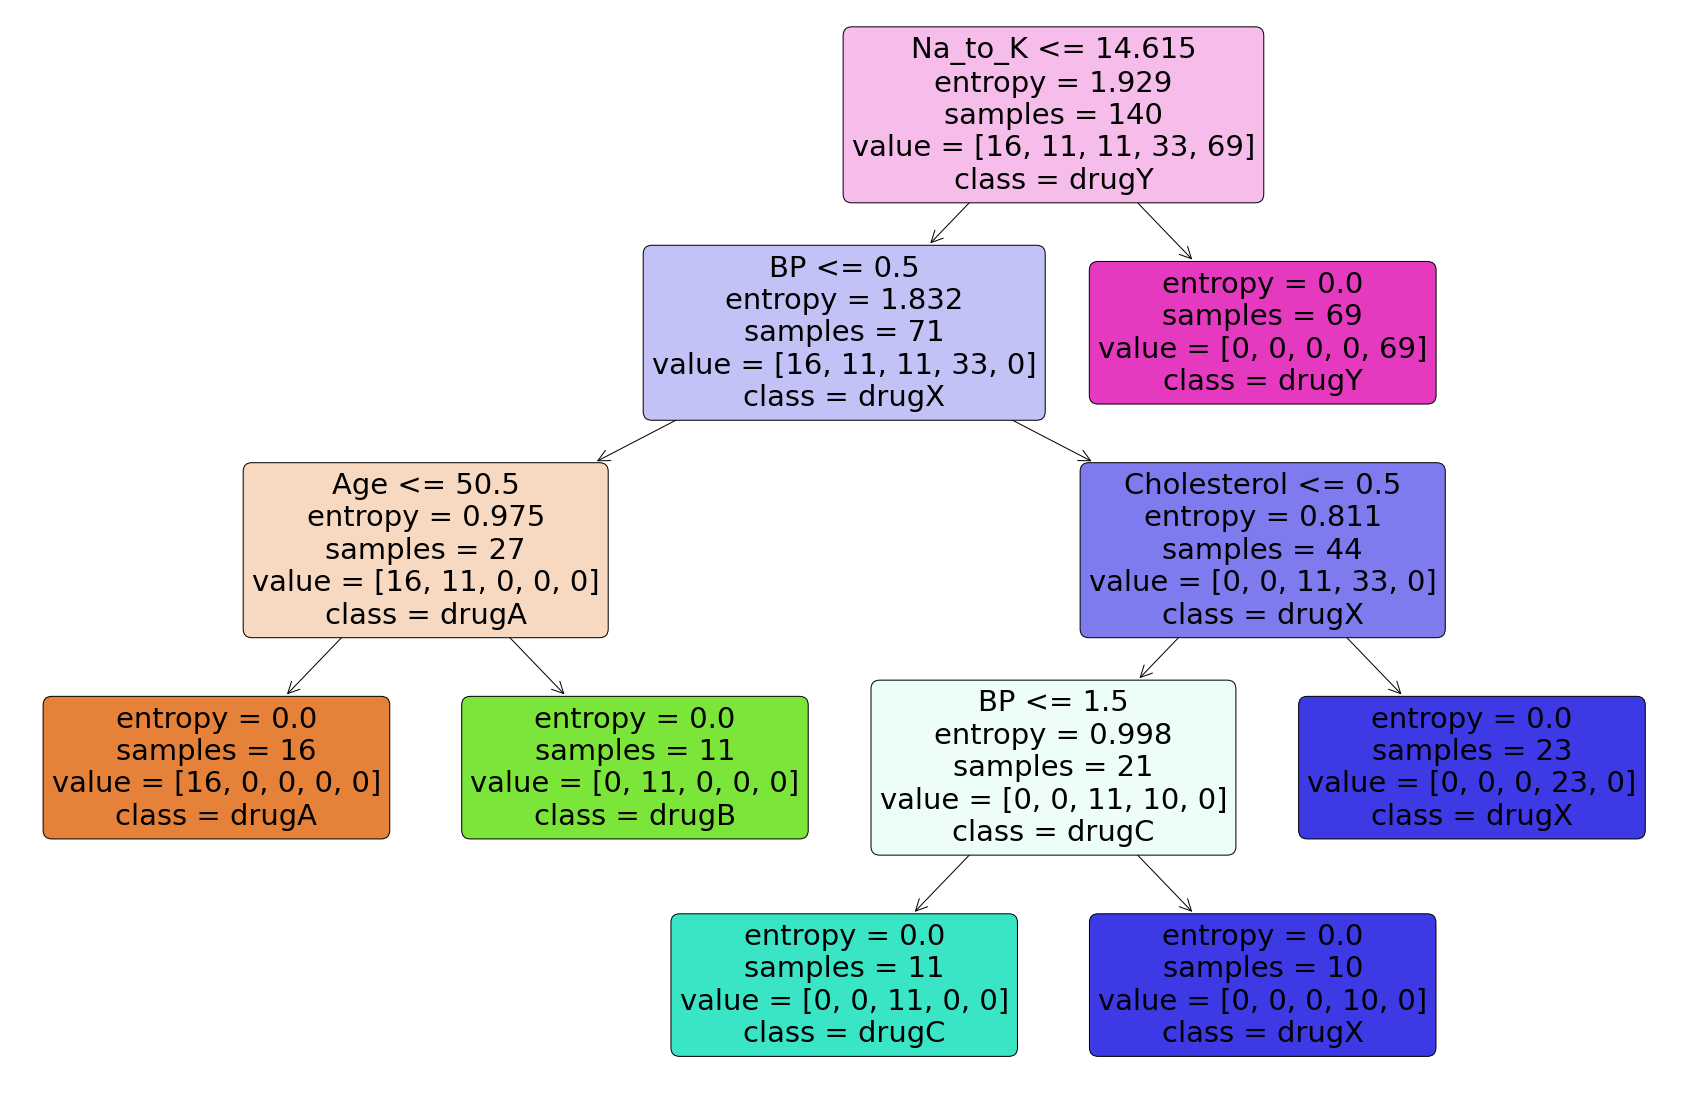

In [40]:
plt.figure(figsize=(30,20))
features = df.columns[0:5]
dt = plot_tree(decision_tree=drug_tree,feature_names = features,
               class_names = np.unique(y_train), filled=True, rounded=True )

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [38]:
cm = confusion_matrix(y_test,pred_tree)
cm

array([[ 7,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0],
       [ 0,  0,  5,  0,  0],
       [ 0,  0,  0, 20,  1],
       [ 0,  0,  0,  0, 22]])

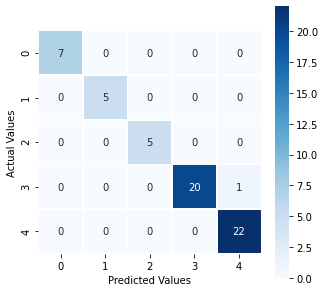

In [39]:
plt.figure(figsize=(5,5))
sns.heatmap(data=cm, linewidths=.5,annot=True,square=True, cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [43]:
ans = drug_tree.decision_path(X_test,check_input=True)
ans

<60x11 sparse matrix of type '<class 'numpy.int64'>'
	with 209 stored elements in Compressed Sparse Row format>

In [ ]:
ans.toarray()

In [49]:
#Avoid overfitting

#Minimal Cost Compelxity Pruning alpha

p = drug_tree.cost_complexity_pruning_path(X_train,y_train)
alpha = p['ccp_alphas']
alpha

array([0.        , 0.12748656, 0.18805868, 0.48596494, 0.99985278])

In [52]:
from sklearn.metrics import accuracy_score
acc_train, acc_test = [],[]
for i in alpha:
  tree = DecisionTreeClassifier(ccp_alpha=i)
  tree.fit(X_train,y_train)
  y_train_pred = tree.predict(X_train)
  y_test_pred = tree.predict(X_test)
  acc_train.append(accuracy_score(y_train,y_train_pred))
  acc_test.append(accuracy_score(y_test,y_test_pred))


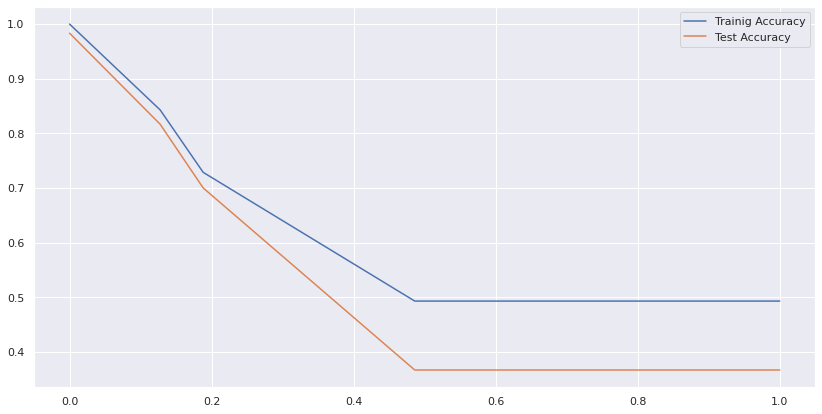

In [53]:
sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=acc_train,x=alpha,label='Trainig Accuracy')
sns.lineplot(y=acc_test,x=alpha,label='Test Accuracy')
plt.show()